# **Supervise Learning: Regression Model**

## Data Repartition

In [1]:
# Import librairies and dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [2]:
# Read the dataset
df = load_wine()
df

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
# Create two pandas dataframes (features and target) from each dictionary atribute  
col_new = df.feature_names
X = pd.DataFrame(df.data,columns=col_new)
Y = pd.DataFrame(df.target,columns=['target'])
print(X.shape) # Features size
print(Y.shape) # Target size
Y

(178, 13)
(178, 1)


,target
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


### Handling Missing Data

In [4]:
# Merge X and Y
df1 = pd.concat((X,Y),axis=1)
df1.isnull().sum() # Check for missing data 


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [5]:
# Display the dataset
df1

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### Handling Outliers

In [6]:
# Display features and target datatypes
df1.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int64
dtype: object

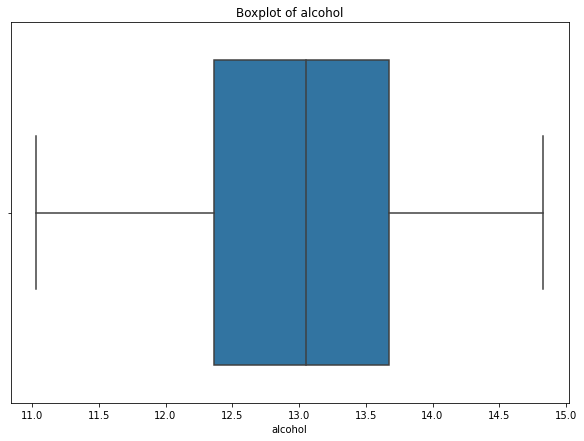

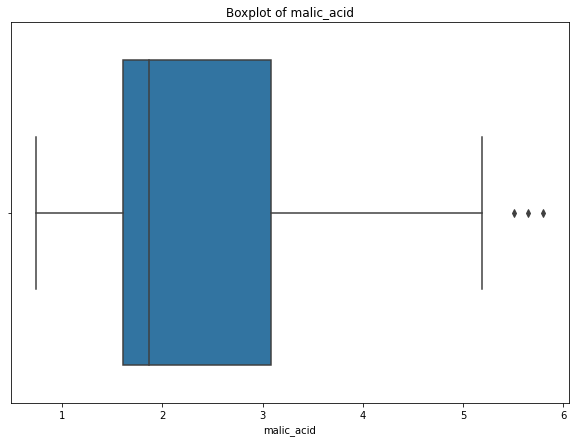

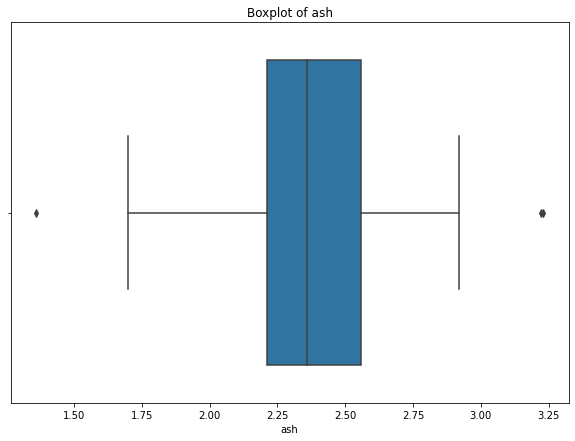

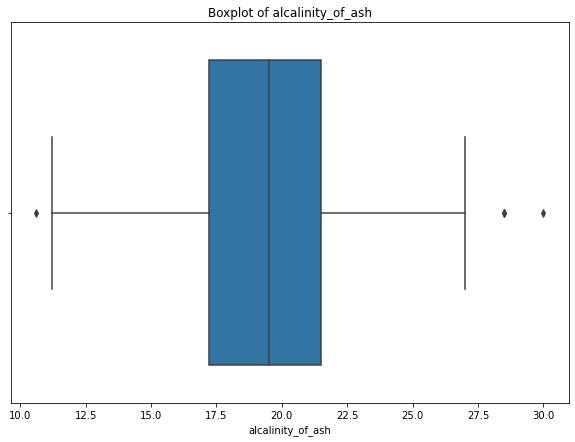

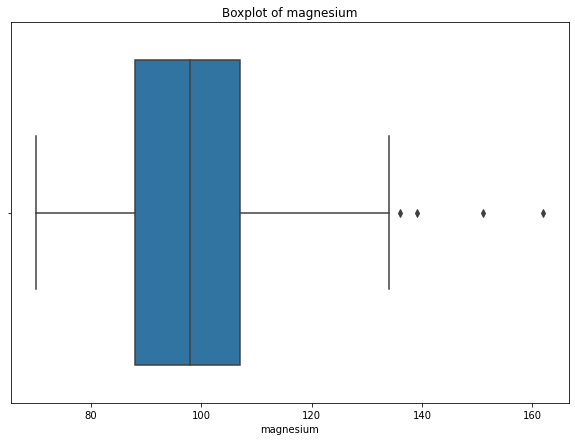

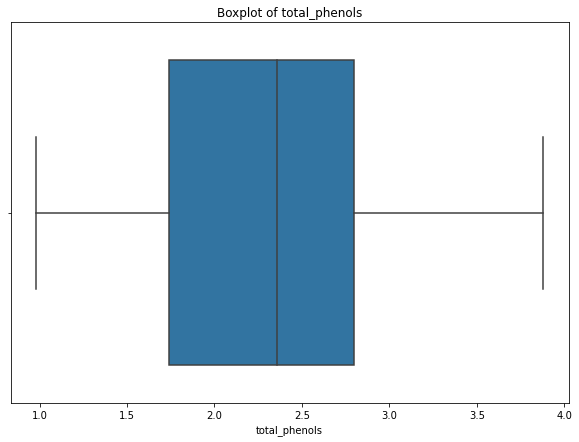

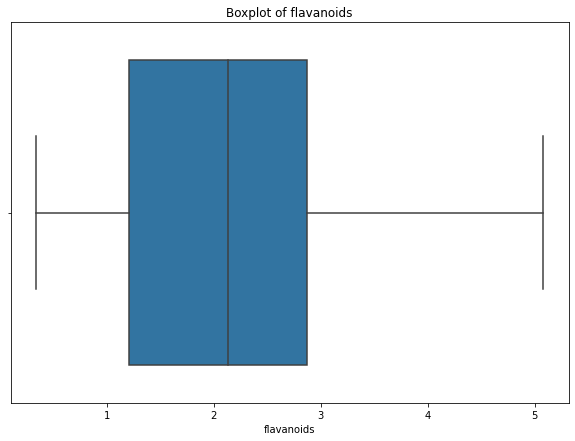

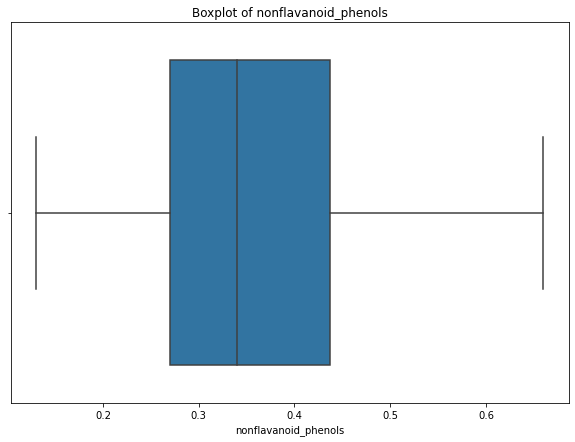

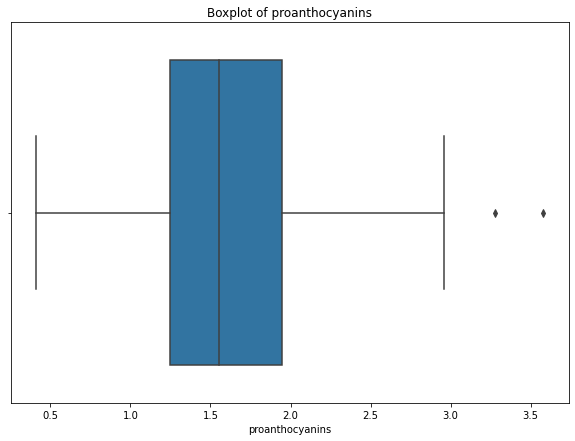

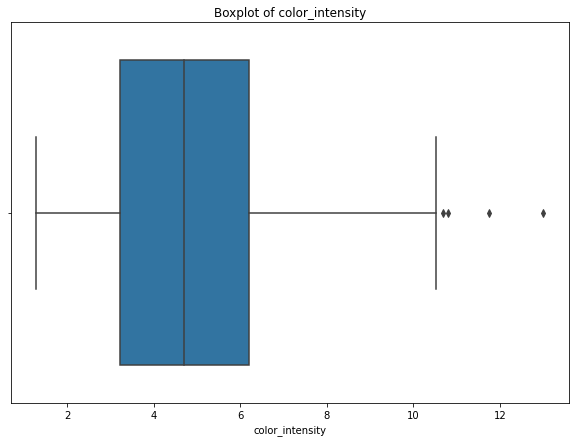

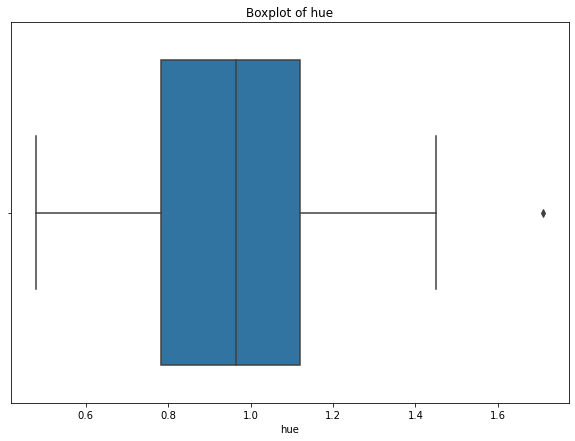

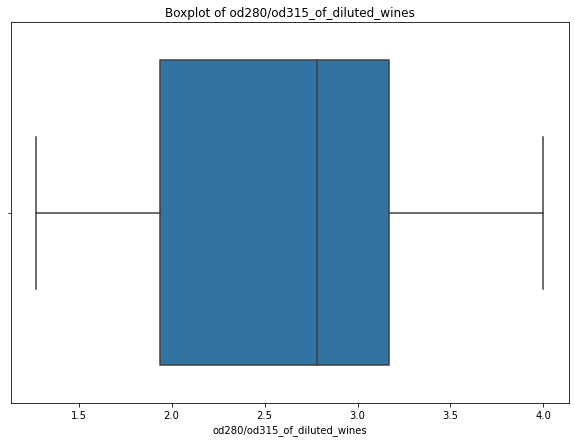

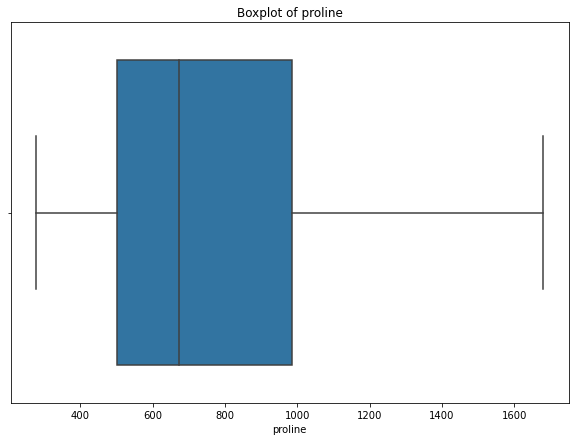

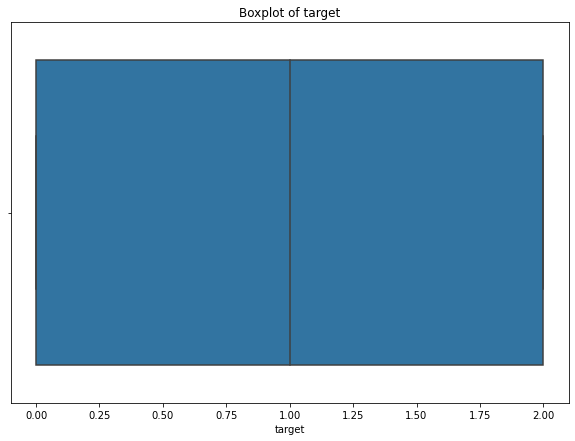

In [7]:
# Create new_columns variable with df1 datatype
# Select all features which numerical data type
#cols_new = df1.select_dtypes(include=numerics)
#new_columns = ['float64','int64']
new_columns = df1.columns
for column in new_columns:
    plt.figure(figsize=(10,7))
    sns.boxplot(x=df1[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

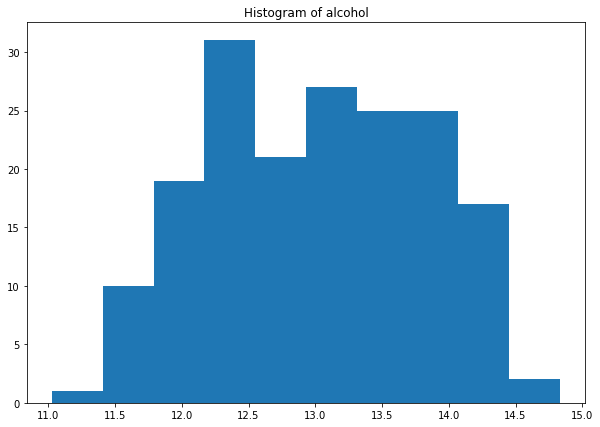

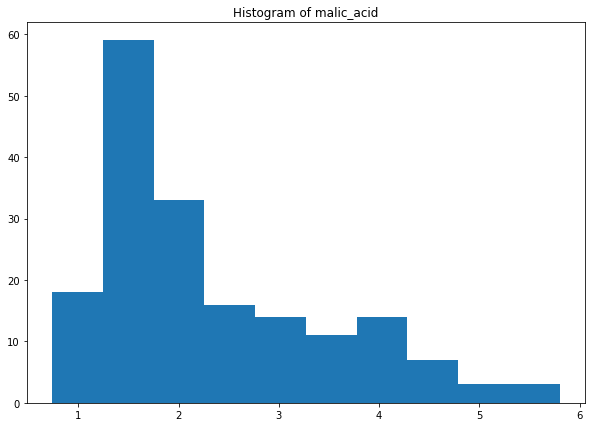

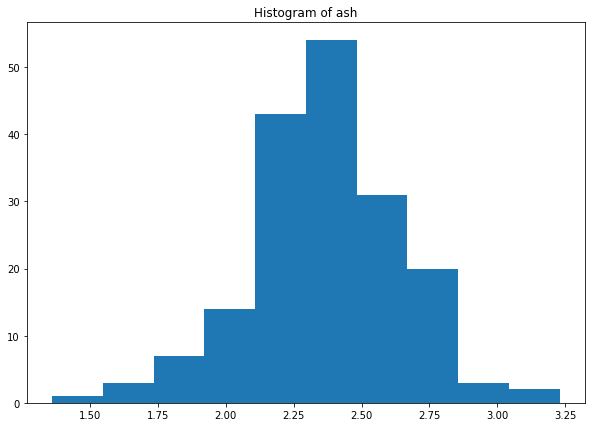

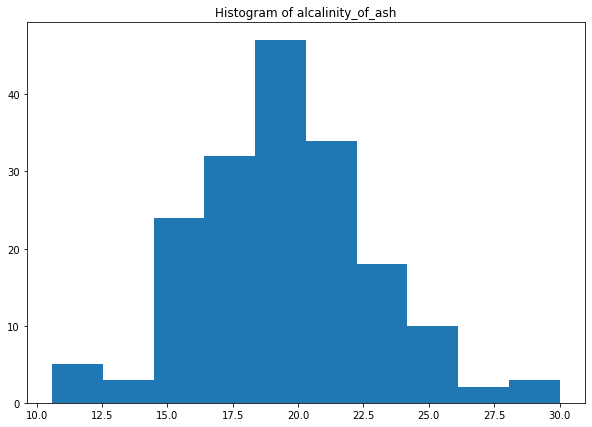

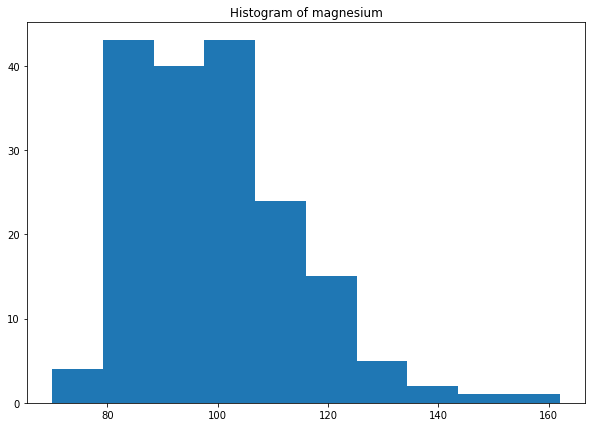

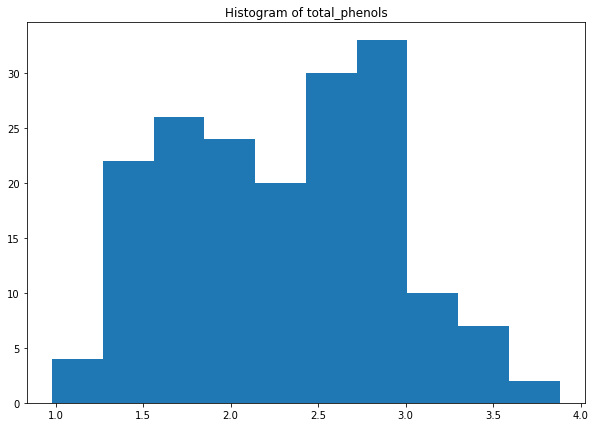

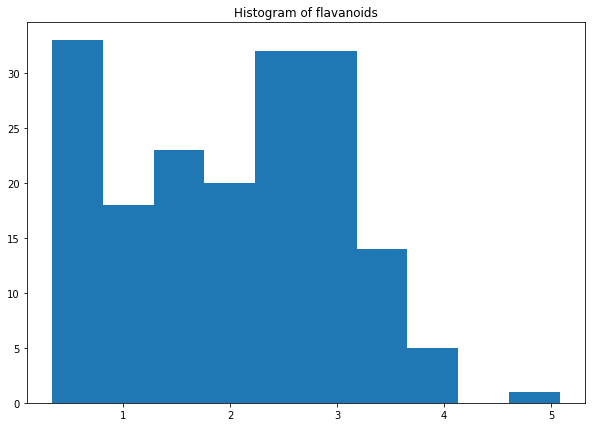

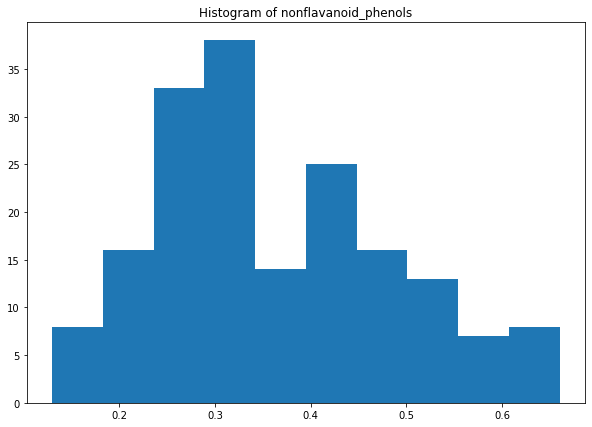

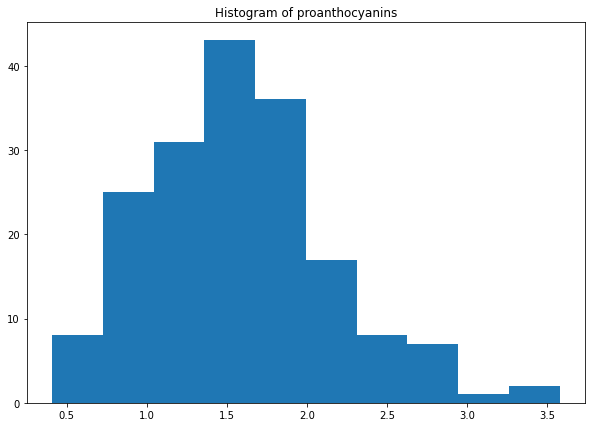

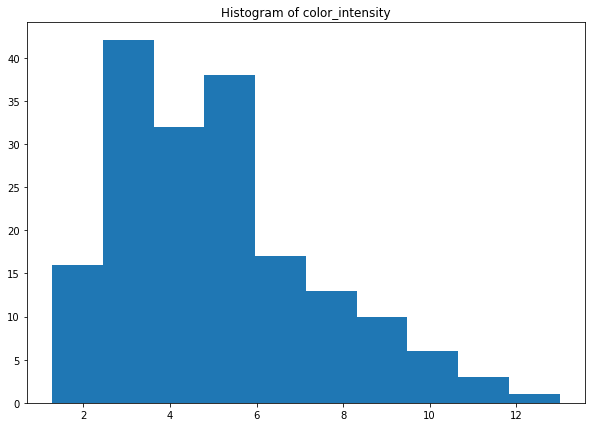

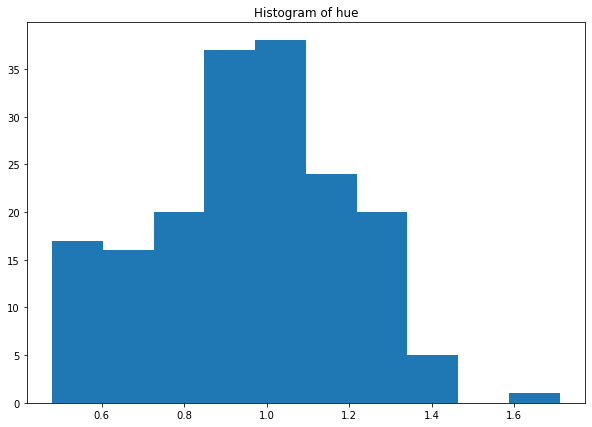

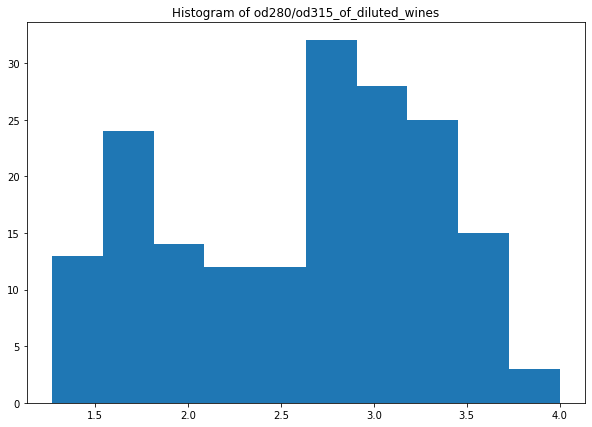

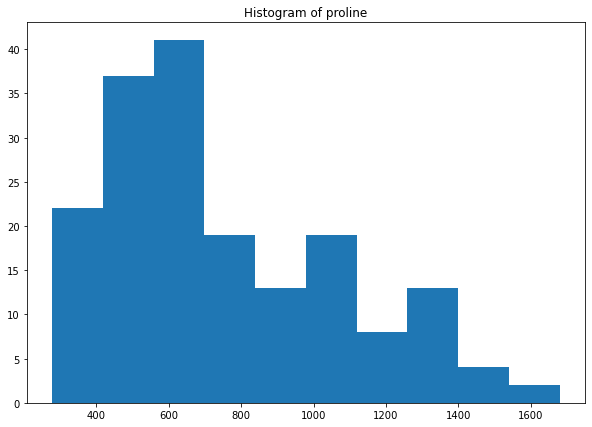

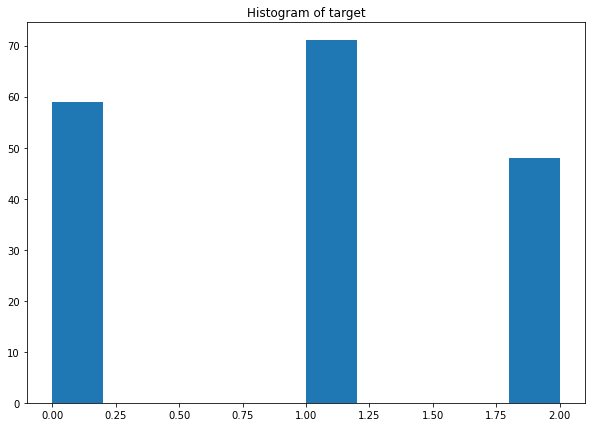

In [8]:
# Create new_columns variable with df1 datatype
# Select all features which numerical data type
#cols_new = df1.select_dtypes(include=numerics)
#new_columns = ['float64','int64']
new_columns = df1.columns
for column in new_columns:
    plt.figure(figsize=(10,7))
    plt.hist(x=df1[column])
    plt.title(f'Histogram of {column}')
    plt.show()

In [9]:
# Compute the maximum and the minimum values for each feature and target

new_column = df1.columns # Assign dataset columns to a variable

# Create a for loop to compute max amd min values for dataset columns
for i in new_column:
    min_val = df1[i].mean() - 3 *(df1[i]).std()
    max_val = df1[i].mean() + 3 *(df1[i]).std()
    # Print max and min 
    print(f'The minimum value for {i} is:{min_val}')
    print(f'The maximum value for {i} is:{max_val}\n')

The minimum value for alcohol is:10.56513836351051
The maximum value for alcohol is:15.436097591545657

The minimum value for malic_acid is:-1.015089978236647
The maximum value for malic_acid is:5.687786607450129

The minimum value for ash is:1.543484826750141
The maximum value for ash is:3.1895488811150297

The minimum value for alcalinity_of_ash is:9.476252518704204
The maximum value for alcalinity_of_ash is:29.513635121745235

The minimum value for magnesium is:56.89412248782086
The maximum value for magnesium is:142.58902357959488

The minimum value for total_phenols is:0.41755921304859456
The maximum value for total_phenols is:4.172665506052529

The minimum value for flavanoids is:-0.9673063921294922
The maximum value for flavanoids is:5.025845717972187

The minimum value for nonflavanoid_phenols is:-0.011506088305768436
The maximum value for nonflavanoid_phenols is:0.7352139534743078

The minimum value for proanthocyanins is:-0.12617771161978797
The maximum value for proanthocyan

In [10]:
# Define dataset columns
df1.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [11]:
# Retrieve and display the possible outliers for malic_acid feature

malic_acid = df1['malic_acid'] # Create a malic acid variable with malic acid feature values
outliers_malic_acid = malic_acid[malic_acid > 5.687786607450129] # Found malic acid outliers
number_outliers = outliers_malic_acid.count()
print(f'Total number of outlier(s) is: {number_outliers}\n') # Number of outliers
print(f'Outlier(s):\n',outliers_malic_acid)

Total number of outlier(s) is: 1

Outlier(s):
 123    5.8
Name: malic_acid, dtype: float64


In [12]:
# Retrieve and display the possible outliers for ash feature

ash = df1['ash'] # Create ash variable with ash feature values
outliers_ash = ash[(ash > 3.1895488811150297) | (ash < 1.543484826750141)] # Found ash outliers located on both sides of the curve
number_outliers = outliers_ash.count()
print(f'Total number of outliers is: {number_outliers}\n') # Number of outliers
print(f'Outlier(s):\n',outliers_ash)

#dataframe[(dataframe['Sex'] == 'female') & (dataframe['Age'] >= 65)]

Total number of outliers is: 3

Outlier(s):
 25     3.22
59     1.36
121    3.23
Name: ash, dtype: float64


In [13]:
# Create features and target variable (X and Y respectively)
X = df1.drop('target', axis=1)
Y = df1['target']

print(X.shape)
print(Y.shape)

(178, 13)
(178,)


In [15]:
# Split dataset into train, test, and validation dataset with a ratio of 60/20/20

# First Create Training and and test set
X1, X_test, Y1, Y_test = train_test_split(X,Y, test_size=0.2, random_state=52)

#print(X1.shape, Y1.shape, X_test.shape, Y_test.shape)

# Second, Create the final training set and the validation set
val_size = 36/142
X_train, Y_train, X_validate, Y_validate = train_test_split(X1,Y1, test_size=val_size, random_state=42)
print(X_train.shape, Y_train.shape, X_validate.shape, Y_validate.shape, X_test.shape, Y_test.shape)

(142, 13) (142,) (36, 13) (36,)
(106, 13) (36, 13) (106,) (36,) (36, 13) (36,)
